In [2]:
import numpy as np

def check_heart_rate(heart_rate_data):
    # Step 1: Create binary masks
    tachy_mask = np.array(heart_rate_data) > 100  # Mask for Tachycardia
    brady_mask = np.array(heart_rate_data) < 60   # Mask for Bradycardia
    
    # Step 2: Identify consecutive runs of abnormal values
    # Calculate differences to find the start and end of runs

    # Add 0s to the beginning and end to make sure the first and last values are included
    tachy_diff = np.diff(np.concatenate(([0], tachy_mask, [0])))  # Calculate diff for Tachycardia
    brady_diff = np.diff(np.concatenate(([0], brady_mask, [0])))  # Calculate diff for Bradycardia

    # Find the indices where runs start and end
    tachy_start_indices = np.where(tachy_diff == 1)[0]
    tachy_end_indices = np.where(tachy_diff == -1)[0] - 1

    brady_start_indices = np.where(brady_diff == 1)[0]
    brady_end_indices = np.where(brady_diff == -1)[0] - 1

    # Step 3: Filter by length of runs
    tachy_alerts = []
    brady_alerts = []

    for start, end in zip(tachy_start_indices, tachy_end_indices):
        lenght = end - start + 1
        if lenght >= 15:  # Check if the run is 15 minutes or more
            tachy_alerts.append((start, end, lenght))

    for start, end in zip(brady_start_indices, brady_end_indices):
        lenght = end - start + 1
        if lenght >= 10:  # Check if the run is 10 minutes or more
            brady_alerts.append((start, end, lenght))

    # Step 4: Combine the alerts
    alerts = {
        "Tachycardia": tachy_alerts,
        "Bradycardia": brady_alerts
    }

    return alerts



In [3]:
# Example usage (dummy data)
# read in the heart rate data csv file as array of integers 
url = "https://raw.githubusercontent.com/stawiskm/pythoncourse/student/Assignments/Data/heart_rate_data.csv"
heart_rate_data = np.genfromtxt(url, delimiter=',')
#heart_rate_data = np.genfromtxt('Data/heart_rate_data.csv', delimiter=',')
# Run the function
alerts = check_heart_rate(heart_rate_data)
print(alerts)  # Print the detected alerts
# {'Tachycardia': [(47, 65, 19), (234, 248, 15), (315, 329, 15), (404, 439, 36)], 'Bradycardia': [(990, 1001, 12), (1090, 1100, 11), (1166, 1179, 14), (1374, 1388, 15)]}

{'Tachycardia': [(47, 65, 19), (234, 248, 15), (315, 329, 15), (404, 439, 36)], 'Bradycardia': [(990, 1001, 12), (1090, 1100, 11), (1166, 1179, 14), (1374, 1388, 15)]}


In [4]:
# Step 1: Create binary masks
tachy_mask = np.array(heart_rate_data) > 100  # Mask for Tachycardia
brady_mask = np.array(heart_rate_data) < 60   # Mask for Bradycardia

In [27]:
for i, v in enumerate(tachy_mask):
    print(i, v, heart_rate_data[i],"\t",i+1,"min")
    if i > 20:
        break

0 True 123.0 	 1 min
1 True 109.0 	 2 min
2 True 102.0 	 3 min
3 True 115.0 	 4 min
4 True 113.0 	 5 min
5 True 117.0 	 6 min
6 True 105.0 	 7 min
7 True 105.0 	 8 min
8 True 118.0 	 9 min
9 True 118.0 	 10 min
10 False 97.0 	 11 min
11 True 116.0 	 12 min
12 False 96.0 	 13 min
13 True 118.0 	 14 min
14 True 124.0 	 15 min
15 False 96.0 	 16 min
16 True 115.0 	 17 min
17 True 127.0 	 18 min
18 True 106.0 	 19 min
19 True 116.0 	 20 min
20 True 119.0 	 21 min
21 True 121.0 	 22 min


In [5]:
# Step 2: Identify consecutive runs of abnormal values
# Calculate differences to find the start and end of runs

# Add 0s to the beginning and end to make sure the first and last values are included
tachy_diff = np.diff(np.concatenate(([0], tachy_mask, [0])))  # Calculate diff for Tachycardia
brady_diff = np.diff(np.concatenate(([0], brady_mask, [0])))  # Calculate diff for Bradycardia

# Find the indices where runs start and end
tachy_start_indices = np.where(tachy_diff == 1)[0]
tachy_end_indices = np.where(tachy_diff == -1)[0] - 1

brady_start_indices = np.where(brady_diff == 1)[0]
brady_end_indices = np.where(brady_diff == -1)[0] - 1

In [15]:
tachy_concats = np.concatenate(([0], tachy_mask, [0]))
tachy_concats

array([0, 1, 1, ..., 0, 0, 0])

In [14]:
tachy_diff

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
np.where(tachy_diff == 1)[0]

array([  0,  11,  13,  16,  26,  31,  36,  47,  67,  72,  81,  95, 100,
       111, 122, 131, 135, 147, 150, 155, 157, 160, 162, 166, 168, 174,
       177, 181, 188, 200, 202, 208, 223, 227, 234, 250, 252, 258, 269,
       273, 278, 280, 293, 302, 309, 315, 332, 336, 338, 341, 349, 351,
       361, 369, 373, 385, 392, 404, 441, 450, 465, 469, 475, 482, 489,
       494, 502, 510, 513, 521, 526, 528, 536, 539, 541, 545, 550, 557,
       559, 562, 564, 571, 578, 582, 585, 590, 593, 598, 607, 610, 613,
       617, 622, 624, 629, 635, 638, 649, 652, 657, 659, 665, 673, 676,
       683, 685, 693, 695, 701, 704, 707, 710, 718, 722, 731, 733, 740,
       757, 766, 775, 777, 781, 787, 798, 802, 807, 809, 813, 821, 823,
       825, 833, 841, 850, 860, 863, 878, 881, 888, 890, 895, 903, 905,
       908, 913, 920, 926])

In [13]:
np.where(tachy_diff == -1)[0]

array([ 10,  12,  15,  25,  30,  35,  43,  66,  71,  80,  94,  97, 110,
       120, 130, 133, 145, 148, 154, 156, 159, 161, 165, 167, 173, 176,
       180, 187, 198, 201, 207, 222, 226, 233, 249, 251, 257, 268, 272,
       277, 279, 292, 301, 308, 312, 330, 335, 337, 340, 348, 350, 360,
       366, 372, 383, 391, 403, 440, 449, 463, 468, 473, 481, 487, 493,
       500, 503, 511, 514, 523, 527, 529, 537, 540, 542, 546, 552, 558,
       560, 563, 565, 573, 579, 584, 586, 591, 594, 600, 608, 611, 615,
       618, 623, 626, 630, 636, 639, 651, 653, 658, 660, 667, 674, 677,
       684, 686, 694, 700, 702, 706, 709, 711, 719, 725, 732, 734, 741,
       759, 769, 776, 779, 782, 788, 799, 804, 808, 810, 814, 822, 824,
       827, 835, 842, 851, 862, 864, 880, 884, 889, 892, 896, 904, 906,
       910, 914, 922, 928])

In [19]:
start_end = zip(tachy_start_indices, tachy_end_indices)
print(list(start_end))

[(0, 10), (11, 12), (13, 15), (16, 25), (26, 30), (31, 35), (36, 43), (47, 66), (67, 71), (72, 80), (81, 94), (95, 97), (100, 110), (111, 120), (122, 130), (131, 133), (135, 145), (147, 148), (150, 154), (155, 156), (157, 159), (160, 161), (162, 165), (166, 167), (168, 173), (174, 176), (177, 180), (181, 187), (188, 198), (200, 201), (202, 207), (208, 222), (223, 226), (227, 233), (234, 249), (250, 251), (252, 257), (258, 268), (269, 272), (273, 277), (278, 279), (280, 292), (293, 301), (302, 308), (309, 312), (315, 330), (332, 335), (336, 337), (338, 340), (341, 348), (349, 350), (351, 360), (361, 366), (369, 372), (373, 383), (385, 391), (392, 403), (404, 440), (441, 449), (450, 463), (465, 468), (469, 473), (475, 481), (482, 487), (489, 493), (494, 500), (502, 503), (510, 511), (513, 514), (521, 523), (526, 527), (528, 529), (536, 537), (539, 540), (541, 542), (545, 546), (550, 552), (557, 558), (559, 560), (562, 563), (564, 565), (571, 573), (578, 579), (582, 584), (585, 586), (590

In [6]:
# Step 3: Filter by length of runs
tachy_alerts = []
brady_alerts = []

for start, end in zip(tachy_start_indices, tachy_end_indices):
    lenght = end - start + 1
    if lenght >= 15:  # Check if the run is 15 minutes or more
        tachy_alerts.append((start, end, lenght))

for start, end in zip(brady_start_indices, brady_end_indices):
    lenght = end - start + 1
    if lenght >= 10:  # Check if the run is 10 minutes or more
        brady_alerts.append((start, end, lenght))

In [7]:
# Step 4: Combine the alerts
alerts = {
    "Tachycardia": tachy_alerts,
    "Bradycardia": brady_alerts
}

## Problem 2

In [ ]:
!wget https://raw.githubusercontent.com/stawiskm/pythoncourse/student/Assignments/Data/mri_image.png

In [27]:
import numpy as np

def analyze_mri_image(mri_image, threshold):
    max_intensity = 0
    min_intensity = 0
    
    # Convert the input image to a numpy array (if not already in that format)
    mri_image = np.array(mri_image)
        
    # Step 1: Create a segmentation mask
    segmentation_mask = (mri_image > threshold).astype(int)
    
    # Step 2: Calculate statistics
    # Get pixels above the threshold
    above_threshold_pixels = mri_image[segmentation_mask == 1]
    
    # Calculate the total number of pixels above the threshold
    total_above_threshold = above_threshold_pixels.size
    
    # Calculate the average intensity of the pixels above the threshold
    if total_above_threshold > 0:
        average_intensity = above_threshold_pixels.mean()
        max_intensity = above_threshold_pixels.max()
        min_intensity = above_threshold_pixels.min()

        # Step 3: Apply the mask and window the pixel values
        # segment the image by applying the mask
        segmented_image = mri_image * segmentation_mask    
        # Rescale the pixel values to the 10-255 range
        windowed_image = (((segmented_image - min_intensity)* 245 ) / (max_intensity - min_intensity))+10

    else:
        average_intensity = 0  # Avoid division by zero if no pixels exceed the threshold
        max_intensity = 0
        min_intensity = 0
        windowed_image = mri_image
        
    
    # Return results
    return {
        'segmentation_mask': segmentation_mask,
        'total_above_threshold': total_above_threshold,
        'average_intensity': average_intensity,
        'max_intensity': max_intensity,
        'windowed_image': windowed_image
    }

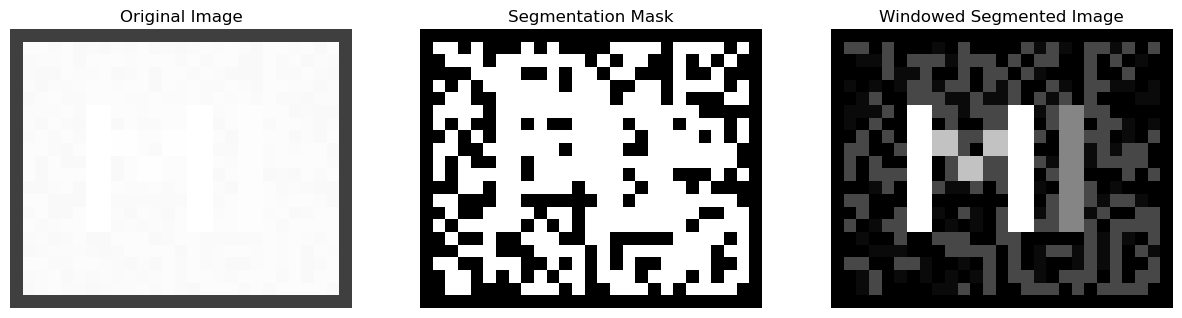

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Example usage (mri_image.png is a dummy image)
mri_image = Image.open('mri_image.png')
#mri_image = Image.open('Data/mri_image.png')

# Convert the image to grayscale
mri_image = np.mean(mri_image, axis=2, dtype=int)
mri_image = np.array(mri_image)
threshold = 250

# Analyze the image
results = analyze_mri_image(mri_image, threshold)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mri_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(results['segmentation_mask'], cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

axes[2].imshow(results['windowed_image'], cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Windowed Segmented Image')
axes[2].axis('off')

plt.show()